In [3]:
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
%pylab inline
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [4]:
train = pd.read_csv("train_starting.csv")

In [5]:
train.columns

Index([u'Unnamed: 0', u'id', u'date_account_created',
       u'timestamp_first_active', u'date_first_booking', u'gender', u'age',
       u'signup_method', u'signup_flow', u'language', u'affiliate_channel',
       u'affiliate_provider', u'first_affiliate_tracked', u'signup_app',
       u'first_device_type', u'first_browser', u'country_destination',
       u'lag_account_created', u'lag_first_active',
       u'lag_account_created_first_active', u'bookings',
       u'population_in_thousands', u'sum_secs_elapsed', u'counts'],
      dtype='object')

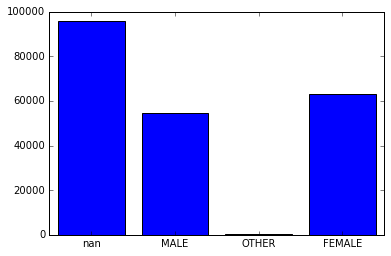

In [9]:
c1 = Counter(train.gender).keys()
c2 = Counter(train.gender).values()
plt.bar(range(len(c1)), c2, align = 'center')
plt.xticks(range(len(c1)), c1)
plt.figure(figsize=(30, 30))

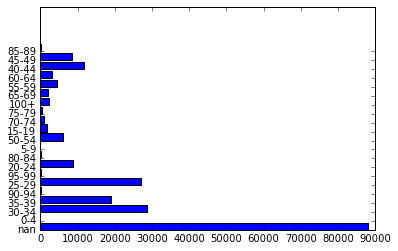

In [31]:
c1 = Counter(train.age).keys()
c2 = Counter(train.age).values()
plt.barh(range(len(c1)), c2)
#plt.xticks(range(len(c1)), c1)
plt.yticks(range(len(c1)), c1)
plt.figure(figsize=(30, 30))

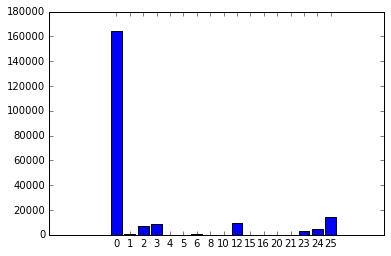

In [39]:
c1 = Counter(train.signup_flow).keys()
c2 = Counter(train.signup_flow).values()
plt.bar(range(len(c1)), c2, align = 'center')
plt.xticks(range(len(c1)), c1)
#plt.yticks(range(len(c1)), c1)
plt.figure(figsize=(30, 30))

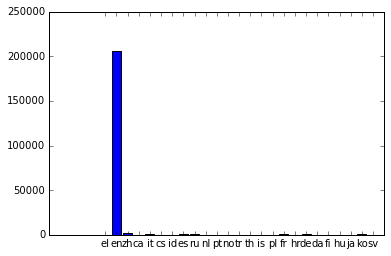

In [40]:
c1 = Counter(train.language).keys()
c2 = Counter(train.language).values()
plt.bar(range(len(c1)), c2, align = 'center')
plt.xticks(range(len(c1)), c1)
#plt.yticks(range(len(c1)), c1)
plt.figure(figsize=(30, 30))

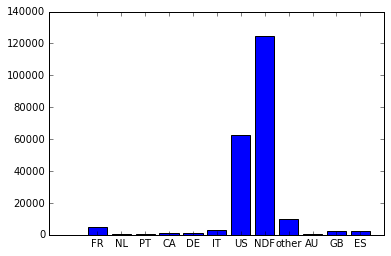

In [41]:
c1 = Counter(train.country_destination).keys()
c2 = Counter(train.country_destination).values()
plt.bar(range(len(c1)), c2, align = 'center')
plt.xticks(range(len(c1)), c1)
#plt.yticks(range(len(c1)), c1)
plt.figure(figsize=(30, 30))

Gender as a function of destination
Age as a functino of country (stacked bar graph)
Same for lag variables

In [62]:
x = randint(0, 100, 10)
y = randint(0, 100, 10)
width = .35

In [98]:
sex_age = train[['gender', 'age', 'id']].groupby(by = ['gender', 'age'])

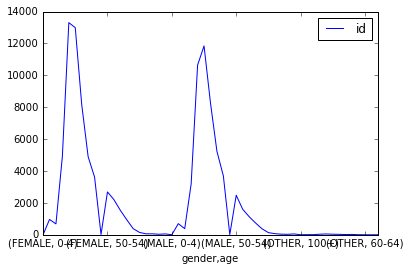

In [101]:
sex_age.count().plot(y = 'id')

In [1]:
#Distribution of date of account created minus date of first booking

In [6]:
train.head()

,Unnamed: 0,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,first_device_type,first_browser,country_destination,lag_account_created,lag_first_active,lag_account_created_first_active,bookings,population_in_thousands,sum_secs_elapsed,counts
0,0,gxn3p5htnn,2010-06-28 00:00:00,2009-03-19 04:32:55,NaN,NaN,NaN,facebook,0,en,...,Mac Desktop,Chrome,NDF,NB,NB,greater 1 day,NB,NB,NaN,NaN
1,1,820tgsjxq7,2011-05-25 00:00:00,2009-05-23 17:48:09,NaN,MALE,35-39,facebook,0,en,...,Mac Desktop,Chrome,NDF,NB,NB,greater 1 day,NB,NB,NaN,NaN
2,2,4ft3gnwmtx,2010-09-28 00:00:00,2009-06-09 23:12:47,2010-08-02 00:00:00,FEMALE,55-59,basic,3,en,...,Windows Desktop,IE,US,before,greater 1 day,greater 1 day,waited,11264.0,NaN,NaN
3,3,bjjt8pjhuk,2011-12-05 00:00:00,2009-10-31 06:01:29,2012-09-08 00:00:00,FEMALE,40-44,facebook,0,en,...,Mac Desktop,Firefox,other,greater 1 day,greater 1 day,greater 1 day,waited,2458.8000000000002,NaN,NaN
4,4,87mebub9p4,2010-09-14 00:00:00,2009-12-08 06:11:05,2010-02-18 00:00:00,NaN,40-44,basic,0,en,...,Mac Desktop,Chrome,US,before,greater 1 day,greater 1 day,waited,NaN,NaN,NaN


In [14]:
type(train.date_first_booking[3])

pandas.tslib.Timestamp

In [13]:
train.date_account_created = pd.to_datetime(train.date_account_created)
train.timestamp_first_active = pd.to_datetime(train.timestamp_first_active)
train.date_first_booking = pd.to_datetime(train.date_first_booking)
#Gender?

In [23]:
np.histogram(np.array(train.date_first_booking - train.date_account_created))

TypeError: ufunc add cannot use operands with types dtype('<m8[ns]') and dtype('float64')

In [26]:
(train.date_first_booking - train.date_account_created).astype(int)

0        -9223372036854775808
1        -9223372036854775808
2           -4924800000000000
3           24019200000000000
4          -17971200000000000
5              86400000000000
6             259200000000000
7             864000000000000
8           17798400000000000
9                           0
10            172800000000000
11       -9223372036854775808
12           1123200000000000
13       -9223372036854775808
14       -9223372036854775808
15             86400000000000
16       -9223372036854775808
17            172800000000000
18       -9223372036854775808
19                          0
20            691200000000000
21             86400000000000
22                          0
23       -9223372036854775808
24       -9223372036854775808
25            259200000000000
26       -9223372036854775808
27            864000000000000
28                          0
29            518400000000000
                 ...         
213421   -9223372036854775808
213422   -9223372036854775808
213423   -

In [50]:
np.apply_along_axis(lambda x: x.days, 0, train.date_first_booking - train.date_account_created)

AttributeError: 'numpy.ndarray' object has no attribute 'days'

In [55]:
x = (train.date_first_booking - train.date_account_created)

In [104]:
y = x.apply(lambda x: x if pd.isnull(x) else x.days)

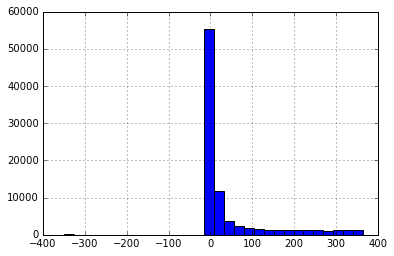

In [107]:
y.hist(bins = 30)

In [111]:
Counter(y)[pd.NaT]

124543